In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp')
dataset

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,AUTOGEN_20210718194557722,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,AUTOGEN_smiles_1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,AUTOGEN_smiles_2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,AUTOGEN_20210718215459405,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,AUTOGEN_smiles_5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,AUTOGEN_smiles_5039,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
5041,AUTOGEN_smiles_5040,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.809668
5042,AUTOGEN_smiles_5041,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.165579
5043,AUTOGEN_smiles_5042,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [3]:
X = dataset.drop(['Name', 'pIC50'], axis = 1)
Y = dataset.pIC50
X = X.fillna(X.mean())
Y = Y.fillna(Y.mean())



In [4]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5041,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5042,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5043,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5040    5.000000
5041    4.809668
5042    4.165579
5043    5.863164
5044    5.863164
Name: pIC50, Length: 5045, dtype: float64

In [6]:
X.shape

(5045, 881)

In [7]:
Y.shape

(5045,)

In [8]:
from sklearn.feature_selection import VarianceThreshold
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X


,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5041,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
5042,1,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
5043,0,1,0,0,0,1,1,1,0,0,...,0,1,0,1,1,1,1,1,0,1


In [9]:
X.to_csv('descriptor_list.csv', index = False)

In [10]:
#Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
#.score: Return the coefficient of determination  of the prediction.
model = RandomForestRegressor(n_estimators = 500)
model.fit(X,Y)
r2 = model.score(X,Y)
r2

0.8126496697173785

In [12]:
#Model Prediction
Y_pred = model.predict(X)
Y_pred

array([5.65233154, 6.459737  , 4.86293482, ..., 4.53928909, 5.73205599,
       5.73557365])

In [13]:
print(Y_pred.size)

5045


In [14]:
#Data Visualization
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

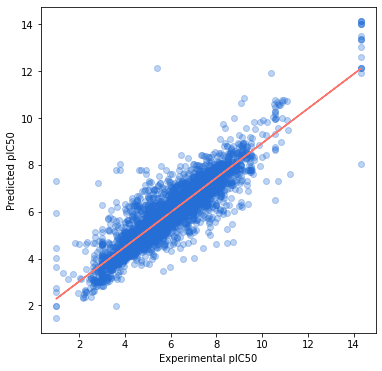

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(x=Y, y=Y_pred, c='#246ed6',alpha=0.3)
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [16]:
import pickle

In [17]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))